# Interindividual difference in learning act or avoid Analysis

# Table of content
* [Install packages](#install)
* [Preparing Data](#Data_prepare)
* [First Hyphothesis](#first_hyp)
    * [No Go to Win Conditions](#Nogo2win)
    * [No Go to Avoid Punishment Conditions](#Nogo2avoid)
    * [First and second session compare](#first_second_compare)
    * [NoGo to Win and NoGo to avoid punishment relationship](#rel_nogo)
    * --

* [First and second session](#first_second_compare)
    * [Difference of (NoGo2Win) accuracy between sessions](#diff_gw_sessions)
    * [Difference of (Go2Win - NoGo2Win) accuracy between sessions](#diff_ngw_gw_sessions)


* [Second Hypothesis](#second_hyp)
    * [EDE index vs. Nogo2win](#EDE_nogo2win)
        * [EDE index vs. mean of Nogo2win](#EDE_mean_nogo2win)
        * [EDE index vs. first session Nogo2win](#EDE_first_nogo2win)
        * [EDE index vs. first session Go2win - Nogo2win](#EDE_first_rel_nogo2win)
        * [EDE index vs. second session NoGo2win](#EDE_second_nogo2win)
        * --

    * [EDE index vs. Nogo2AvoidPunishment](#EDE_nogo2avoid)
        * [EDE index vs. mean of Nogo2avoid](#EDE_mean_nogo2avoid)
        * [EDE index vs. first session Nogo2avoid](#EDE_first_nogo2avoid)
        <!-- * [EDE index vs. first session Go2win - Nogo2win](#EDE_first_rel_nogo2win) -->
        <!-- * [EDE index vs. second session NoGo2avoid](#EDE_second_nogo2avoid) -->
        * --

* [Gender analysis](#gender)
    * [Eating disorder index vs. gender](#EDE_gender)
    * [Eating disorder index vs. nogo2win performance](#EDE_gender_performance)
    * [Nogo2win performance vs. Eating disorder index (Colorize by gender)](#EDE_nogo2win_gender)
    * --
* [Age vs. nogo2win performance](#age_nogo2win)
* [BMI vs. nogo2win performance](#bmi_nogo2win)
* [Other Questionnaire index vs. nogo2win performance](#Quind_nogo2win)
    * [Restraint vs. nogo2win performance](#restraint_nogo2win)
    * [Eating concern vs. nogo2win performance](#eating_concern_nogo2win)
    * [Weight concern vs. nogo2win performance](#weight_concern_nogo2win)
    * [Shape concern vs. nogo2win performance](#shape_concern_nogo2win) 
    * --
* [Pet Analysis](#pet)
    * [number of pets vs. ](#numpet_nogo2win)
* [Eating disorder prediction (Ridge regression)]()



        

<a id="install"></a>
# Install Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import json

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

<a id="Data_prepare"></a>
# Preparing Data

In [35]:
first_round_perfornance = pd.read_csv('Data/first_round_final_performance.csv',index_col= 0)
# first_round_perfornance.columns = ['mturkID', 'first_go2avoidPun', 'first_go2win', 'first_nogo2avoidPun', 'first_nogo2win']
second_round_perfornance = pd.read_csv('Data/second_round_final_performance.csv',index_col= 0)
# second_round_perfornance.columns = ['mturkID', 'second_go2avoidPun', 'second_go2win', 'second_nogo2avoidPun', 'second_nogo2win']


In [36]:
all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')
all_performance.gender_second_session = all_performance.gender_second_session.map({'female':'female','other':'female','male':'male'})
all_performance.gender_first_session = all_performance.gender_first_session.map({'female':'female','other':'female','male':'male'})
all_performance = all_performance.drop_duplicates()

In [37]:
all_performance['first_rel_nogo2win'] = all_performance['go2win_first_session'] - all_performance['nogo2win_first_session'] 
all_performance['second_rel_nogo2win'] = all_performance['go2win_second_session'] - all_performance['nogo2win_second_session'] 

all_performance['first_rel_nogo2avoidPun'] = all_performance['go2win_first_session'] - all_performance['nogo2avoidPun_first_session']
all_performance['second_rel_nogo2avoidPun'] = all_performance['go2win_second_session'] - all_performance['nogo2avoidPun_second_session'] 


In [45]:
Questionnare_data =     pd.read_csv('Data/cleaned_questionnaire_data.csv',index_col= 0).rename(columns = {'index':'mturkID'})

perf_questionnaire_data = pd.merge(Questionnare_data, all_performance, on='mturkID' )
perf_questionnaire_data['nogo2win_mean_performance'] = (perf_questionnaire_data['nogo2win_first_session'] + perf_questionnaire_data['nogo2win_second_session'])/2
perf_questionnaire_data['nogo2avoidPun_mean_performance'] = (perf_questionnaire_data['nogo2avoidPun_first_session'] + perf_questionnaire_data['nogo2avoidPun_second_session'])/2



# perf_questionnaire_data["pet-type"] = perf_questionnaire_data["pet-type"].map(lambda x: x if type(x)!=str else x.lower())

<a id="first_hyp"></a>
# First Hypothesis
1. Our first hypothesis is that Pavlovian bias in learning is a stable, trait-like characteristic of human agents. 

<a id="Nogo2win"></a>
## No Go to Win Conditions

### Absolute performance

In [9]:
# all_performance = all_performance[all_performance.mturkID != 'A2TLN8489YGY81_agaign']

In [10]:
test_res = stats.pearsonr(all_performance.nogo2win_first_session, all_performance.nogo2win_second_session)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.24495854470388134
p-value:  0.008620092938038521


<AxesSubplot:xlabel='nogo2win_first_session', ylabel='nogo2win_second_session'>

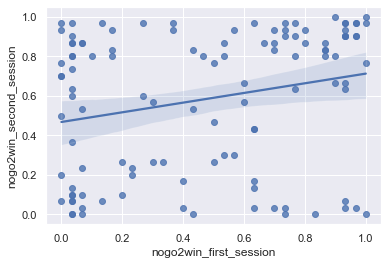

In [11]:
sns.regplot(x = all_performance.nogo2win_first_session, y = all_performance.nogo2win_second_session)

In [12]:
smf.ols(formula = 'nogo2win_second_session ~ nogo2win_first_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     nogo2win_second_session   R-squared:                       0.060
Model:                                 OLS   Adj. R-squared:                  0.052
Method:                      Least Squares   F-statistic:                     7.150
Date:                     Fri, 11 Feb 2022   Prob (F-statistic):            0.00862
Time:                             10:27:10   Log-Likelihood:                -40.364
No. Observations:                      114   AIC:                             84.73
Df Residuals:                          112   BIC:                             90.20
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4674      0.054      8.649      0.000       0.360       0.575
nogo2win_first_session     0.2446      0.091      2.674      0.009       0.063       0.426
==============================================================================
Omnibus:                       30.701   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.959
Skew:                          -0.525   Prob(JB):                      0.00417
Kurtosis:                       1.903   Cond. No.                         3.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
huber_t = sm.RLM(all_performance.nogo2win_second_session, sm.add_constant(all_performance.nogo2win_first_session), M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(
    hub_results.summary(
        yname="y", xname=["var_%d" % i for i in range(len(hub_results.params))]
    )
)

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  114
Model:                            RLM   Df Residuals:                      112
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 11 Feb 2022                                         
Time:                        10:27:10                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.4639      0.057      8.138      0.0

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Relative performace 

In [14]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2win, all_performance.second_rel_nogo2win)
print('correlation between first and second round actual performance: ', test_res[0])
print('p-value: ', test_res[1])

correlation between first and second round actual performance:  0.22825644281118884
p-value:  0.01458229112036293


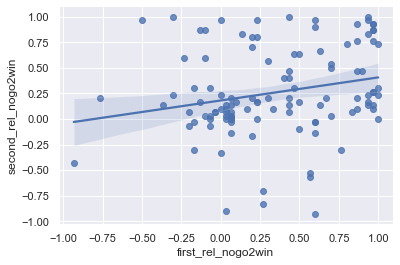

In [15]:
g =  sns.regplot(x = all_performance.first_rel_nogo2win, y = all_performance.second_rel_nogo2win, x_jitter=0)
# g.figure.set_size_inches(6, 6)
sns.despine()

In [16]:
smf.ols(formula = 'second_rel_nogo2win ~ first_rel_nogo2win', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     second_rel_nogo2win   R-squared:                       0.052
Model:                             OLS   Adj. R-squared:                  0.044
Method:                  Least Squares   F-statistic:                     6.156
Date:                 Fri, 11 Feb 2022   Prob (F-statistic):             0.0146
Time:                         10:27:15   Log-Likelihood:                -62.500
No. Observations:                  114   AIC:                             129.0
Df Residuals:                      112   BIC:                             134.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1807      0.051      3.571      0.001       0.080       0.281
first_rel_nogo2win     0.2253      0.091      2.481      0.015       0.045       0.405
==============================================================================
Omnibus:                        1.868   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.338
Skew:                          -0.178   Prob(JB):                        0.512
Kurtosis:                       3.393   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
huber_t = sm.RLM(all_performance.first_rel_nogo2win, sm.add_constant(all_performance.second_rel_nogo2win), M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(
    hub_results.summary(
        yname="y", xname=["var_%d" % i for i in range(len(hub_results.params))]
    )
)

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  114
Model:                            RLM   Df Residuals:                      112
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 11 Feb 2022                                         
Time:                        10:27:20                                         
No. Iterations:                     9                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.2996      0.046      6.462      0.0

<a id="Nogo2avoid"></a>
## No Go to Avoid Punishment Conditions

### Absolute performance

<AxesSubplot:xlabel='nogo2avoidPun_first_session', ylabel='nogo2avoidPun_second_session'>

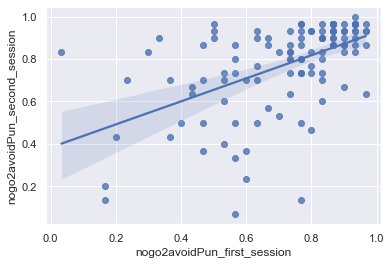

In [19]:
sns.regplot(x = all_performance.nogo2avoidPun_first_session, y = all_performance.nogo2avoidPun_second_session)

In [20]:
smf.ols(formula = 'nogo2avoidPun_first_session ~ nogo2avoidPun_second_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     nogo2avoidPun_first_session   R-squared:                       0.282
Model:                                     OLS   Adj. R-squared:                  0.275
Method:                          Least Squares   F-statistic:                     43.92
Date:                         Fri, 11 Feb 2022   Prob (F-statistic):           1.25e-09
Time:                                 10:27:24   Log-Likelihood:                 38.361
No. Observations:                          114   AIC:                            -72.72
Df Residuals:                              112   BIC:                            -67.25
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.3168      0.063      5.069      0.000       0.193       0.441
nogo2avoidPun_second_session     0.5176      0.078      6.627      0.000       0.363       0.672
==============================================================================
Omnibus:                       28.981   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.117
Skew:                          -1.172   Prob(JB):                     9.68e-11
Kurtosis:                       5.053   Cond. No.                         7.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Relative performance

<AxesSubplot:xlabel='first_rel_nogo2avoidPun', ylabel='second_rel_nogo2avoidPun'>

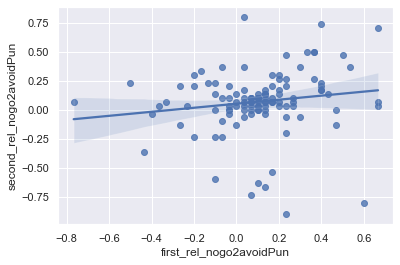

In [21]:
sns.regplot(x = all_performance.first_rel_nogo2avoidPun, y = all_performance.second_rel_nogo2avoidPun)

In [22]:
smf.ols(formula = 'first_rel_nogo2avoidPun ~ second_rel_nogo2avoidPun', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     first_rel_nogo2avoidPun   R-squared:                       0.023
Model:                                 OLS   Adj. R-squared:                  0.014
Method:                      Least Squares   F-statistic:                     2.657
Date:                     Fri, 11 Feb 2022   Prob (F-statistic):              0.106
Time:                             10:27:26   Log-Likelihood:                 3.9554
No. Observations:                      114   AIC:                            -3.911
Df Residuals:                          112   BIC:                             1.562
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0931      0.023      4.082      0.000       0.048       0.138
second_rel_nogo2avoidPun     0.1336      0.082      1.630      0.106      -0.029       0.296
==============================================================================
Omnibus:                        9.040   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.934
Skew:                          -0.340   Prob(JB):                     0.000942
Kurtosis:                       4.572   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="first_second_compare"></a>
## First and Second session differences in performance

In [23]:
performance_difference = all_performance[['go2avoidPun_second_session', 'go2win_second_session','nogo2avoidPun_second_session', 'nogo2win_second_session','go2avoidPun_first_session', 'go2win_first_session',
       'nogo2avoidPun_first_session', 'nogo2win_first_session']].melt()

def extract_condition(x):
    if('nogo2avoidPun' in x):
        return 'nogo2avoidPun'
    elif('nogo2win' in x):
        return 'nogo2win'
    elif( 'go2avoidPun' in x):
        return 'go2avoidPun'
    elif( 'go2win' in x):
        return 'go2win'
    else:
        return 'error'

def extract_session(x):
    if('first' in x):
        return 'first'
    elif('second' in x):
        return 'second'
    else:
        return 'error'

performance_difference['condition'] = performance_difference.variable.apply(lambda x: extract_condition(x))

performance_difference['session'] = performance_difference.variable.apply(lambda x: extract_session(x))


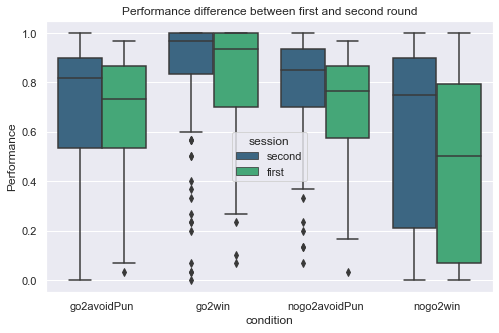

In [24]:
plt.figure(figsize=(8,5))
# sns.swarmplot(x = 'condition', y = 'value', hue = 'session', dodge=True, palette='viridis', data = performance_difference)
sns.boxplot(x = 'condition', y = 'value', hue = 'session',  palette='viridis', data = performance_difference)
plt.title('Performance difference between first and second round')
plt.ylabel('Performance')
plt.show()

<a id='diff_gw_sessions'></a>
# Difference of NoGo2Win accuracy between sessions

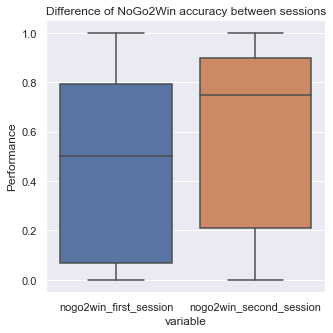

Ttest_indResult(statistic=2.3532802485987507, pvalue=0.019466683507243808)


In [25]:
plt.figure(figsize=(5,5))

sns.boxplot ( y='value',x='variable', data= pd.melt(all_performance[['nogo2win_first_session','nogo2win_second_session']]))

plt.title('Difference of NoGo2Win accuracy between sessions')
plt.ylabel('Performance')
plt.show()
print(stats.ttest_ind(all_performance['nogo2win_second_session'], all_performance['nogo2win_first_session']))

<a id='diff_gw_ngw_sessions'></a>
# Difference of (Go2Win - NoGo2Win) accuracy between sessions

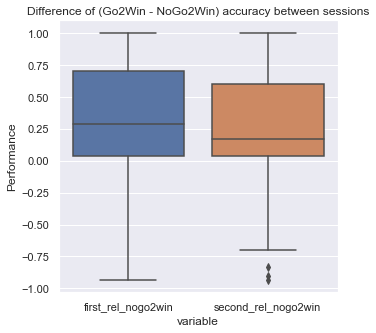

Ttest_indResult(statistic=1.5385623148653673, pvalue=0.1253100813164634)


In [26]:
plt.figure(figsize=(5,5))

sns.boxplot ( y='value',x='variable', data= pd.melt(all_performance[['first_rel_nogo2win', 'second_rel_nogo2win']]))

plt.title('Difference of (Go2Win - NoGo2Win) accuracy between sessions')
plt.ylabel('Performance')
plt.show()
print(stats.ttest_ind(all_performance['first_rel_nogo2win'], all_performance['second_rel_nogo2win']))

<a id="rel_nogo"></a>
## NoGo to Win and NoGo to avoid punishment relationship

<AxesSubplot:xlabel='nogo2win_first_session', ylabel='nogo2avoidPun_first_session'>

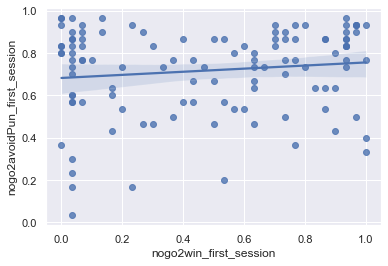

In [27]:
sns.regplot(x = all_performance.nogo2win_first_session, y = all_performance.nogo2avoidPun_first_session)

In [28]:
np.cov(all_performance.nogo2avoidPun_first_session,all_performance.nogo2win_first_session)

array([[0.04195182, 0.0093707 ],
       [0.0093707 , 0.12790319]])

In [29]:
smf.ols(formula = 'nogo2avoidPun_first_session ~ nogo2win_first_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     nogo2avoidPun_first_session   R-squared:                       0.016
Model:                                     OLS   Adj. R-squared:                  0.008
Method:                          Least Squares   F-statistic:                     1.863
Date:                         Fri, 11 Feb 2022   Prob (F-statistic):              0.175
Time:                                 10:27:48   Log-Likelihood:                 20.444
No. Observations:                          114   AIC:                            -36.89
Df Residuals:                              112   BIC:                            -31.42
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.6821      0.032     21.515      0.000       0.619       0.745
nogo2win_first_session     0.0733      0.054      1.365      0.175      -0.033       0.180
==============================================================================
Omnibus:                       17.198   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.969
Skew:                          -0.999   Prob(JB):                     4.61e-05
Kurtosis:                       3.463   Cond. No.                         3.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="second_hyp"></a>
# Second Hypothesis

Uncomment below to exclude who responded the same for all questions

In [99]:
# perf_questionnaire_data = perf_questionnaire_data[(perf_questionnaire_data['data_quality'] != 0)]

<a id="EDE_nogo2win"></a>
# Eating Disorder Index Vs. nogo2win Performance

<a id="EDE_mean_nogo2win"></a>
### Average of performance of 2 sessions of NoGo2Win vs. Food disorder index

<AxesSubplot:xlabel='global_score', ylabel='nogo2win_mean_performance'>

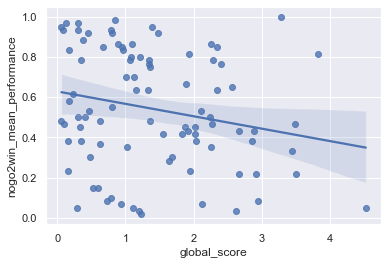

In [53]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2win_mean_performance' )

In [54]:
test_res = stats.pearsonr(perf_questionnaire_data.global_score, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.2164798904563236
p-value:  0.03929853044125109


### OLS regression

In [55]:
smf.ols(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.047
Model:                                   OLS   Adj. R-squared:                  0.036
Method:                        Least Squares   F-statistic:                     4.376
Date:                       Fri, 11 Feb 2022   Prob (F-statistic):             0.0393
Time:                               10:31:33   Log-Likelihood:                -14.054
No. Observations:                         91   AIC:                             32.11
Df Residuals:                             89   BIC:                             37.13
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6286      0.051     12.249      0.000       0.527       0.731
global_score    -0.0619      0.030     -2.092      0.039      -0.121      -0.003
==============================================================================
Omnibus:                       11.297   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.207
Skew:                          -0.213   Prob(JB):                        0.122
Kurtosis:                       2.036   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multi-level regression

In [56]:
perf_questionnaire_data.gender_first_session.value_counts()

male      49
female    42
Name: gender_first_session, dtype: int64

In [57]:
model = smf.mixedlm("nogo2win_mean_performance ~  global_score ",
                    perf_questionnaire_data, re_formula='1',
                    groups= "gender_first_session" ).fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:            MixedLM Dependent Variable: nogo2win_mean_performance
No. Observations: 91      Method:             REML                     
No. Groups:       2       Scale:              0.0773                   
Min. group size:  42      Likelihood:         -17.7583                 
Max. group size:  49      Converged:          Yes                      
Mean group size:  45.5                                                 
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.614    0.082  7.450 0.000  0.453  0.776
global_score                 -0.055    0.029 -1.896 0.058 -0.112  0.002
gender_first_session Var      0.008    0.052                           
=======================================================================

"""

In [58]:
md = smf.mixedlm(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data, groups = perf_questionnaire_data.BMI)
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nogo2win_mean_performance
No. Observations: 91      Method:             REML                     
No. Groups:       86      Scale:              0.0517                   
Min. group size:  1       Likelihood:         -18.9647                 
Max. group size:  2       Converged:          Yes                      
Mean group size:  1.1                                                  
--------------------------------------------------------------------------
                 Coef.     Std.Err.      z       P>|z|    [0.025    0.975]
--------------------------------------------------------------------------
Intercept         0.629       0.052    12.203    0.000     0.528     0.730
global_score     -0.064       0.029    -2.175    0.030    -0.122    -0.006
Group Var         0.030       0.225                                       



<a id="EDE_first_nogo2win"></a>

### First performance of NoGo2Win Vs. Food disorder index

* Please note that an individual in our data has participated in the first and third round but no second. and his data has effects on the p-value.

In [59]:
perf_questionnaire_data_for_first_round = pd.merge(Questionnare_data, first_round_perfornance, on='mturkID' )
perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round.drop_duplicates(subset = 'mturkID')
# perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round[perf_questionnaire_data_for_first_round.mturkID != 'A1PAY3X73PQ16S']
# perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round[(perf_questionnaire_data_for_first_round['data_quality'] != 0)]

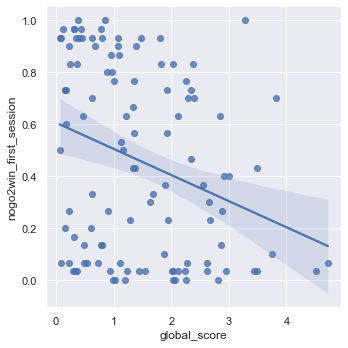

In [60]:
sns.lmplot(data = perf_questionnaire_data_for_first_round, x = 'global_score', y = 'nogo2win_first_session' )

In [61]:
smf.ols(formula = 'nogo2win_first_session ~ global_score', data = perf_questionnaire_data_for_first_round).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     nogo2win_first_session   R-squared:                       0.090
Model:                                OLS   Adj. R-squared:                  0.081
Method:                     Least Squares   F-statistic:                     10.92
Date:                    Fri, 11 Feb 2022   Prob (F-statistic):            0.00128
Time:                            10:32:05   Log-Likelihood:                -39.426
No. Observations:                     113   AIC:                             82.85
Df Residuals:                         111   BIC:                             88.31
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6060      0.055     11.052      0.000       0.497       0.715
global_score    -0.1006      0.030     -3.305      0.001      -0.161      -0.040
==============================================================================
Omnibus:                      128.022   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.318
Skew:                          -0.053   Prob(JB):                      0.00947
Kurtosis:                       1.597   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
perf_questionnaire_data_for_first_round.gender_first_session.value_counts()

male      61
female    49
other      3
Name: gender_first_session, dtype: int64

#### Baseline

In [64]:
model = smf.mixedlm("nogo2win_first_session ~  1 + global_score",
                    perf_questionnaire_data_for_first_round, re_formula='1',
                    groups= "gender_first_session" ).fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:            MixedLM Dependent Variable: nogo2win_first_session
No. Observations: 113     Method:             REML                  
No. Groups:       3       Scale:              0.1163                
Min. group size:  3       Likelihood:         -43.8642              
Max. group size:  61      Converged:          Yes                   
Mean group size:  37.7                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.622    0.097  6.448 0.000  0.433  0.811
global_score              -0.096    0.030 -3.160 0.002 -0.155 -0.036
gender_first_session Var   0.010    0.068                           
====================================================================

"""

In [65]:
model = smf.mixedlm("nogo2win_first_session ~  1 + global_score ",
                    perf_questionnaire_data_for_first_round[perf_questionnaire_data_for_first_round.gender_first_session != 'other'],
                    re_formula='1',
                    groups= "gender_first_session" ).fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:            MixedLM Dependent Variable: nogo2win_first_session
No. Observations: 110     Method:             REML                  
No. Groups:       2       Scale:              0.1154                
Min. group size:  49      Likelihood:         -41.9762              
Max. group size:  61      Converged:          Yes                   
Mean group size:  55.0                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.599    0.073  8.181 0.000  0.455  0.742
global_score              -0.105    0.031 -3.410 0.001 -0.165 -0.045
gender_first_session Var   0.005    0.028                           
====================================================================

"""

<a id="EDE_first_rel_nogo2win"></a>
### First session performance of (Go2Win - NoGo2Win) Vs. Food disorder index

Text(0, 0.5, '(GW - NGW) performance')

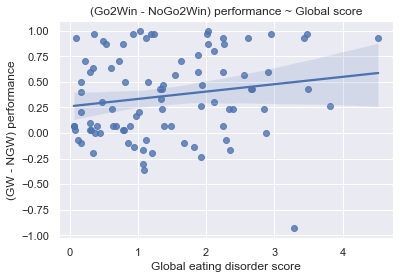

In [66]:
plt.figure()

sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'first_rel_nogo2win' )
plt.title('(Go2Win - NoGo2Win) performance ~ Global score')

plt.xlabel('Global eating disorder score')
plt.ylabel('(GW - NGW) performance')



In [67]:
smf.ols(formula = 'first_rel_nogo2win ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     first_rel_nogo2win   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.827
Date:                Fri, 11 Feb 2022   Prob (F-statistic):             0.0962
Time:                        10:33:14   Log-Likelihood:                -47.932
No. Observations:                  91   AIC:                             99.86
Df Residuals:                      89   BIC:                             104.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2602      0.074      3.494      0.001       0.112       0.408
global_score     0.0722      0.043      1.681      0.096      -0.013       0.157
==============================================================================
Omnibus:                        1.268   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                0.975
Skew:                          -0.252   Prob(JB):                        0.614
Kurtosis:                       3.049   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
md = smf.mixedlm(formula = 'first_rel_nogo2win ~ global_score', data = perf_questionnaire_data, groups = perf_questionnaire_data.BMI)
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: first_rel_nogo2win
No. Observations: 91      Method:             REML              
No. Groups:       86      Scale:              0.1218            
Min. group size:  1       Likelihood:         -51.8297          
Max. group size:  2       Converged:          Yes               
Mean group size:  1.1                                           
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.269      0.075   3.588   0.000    0.122    0.417
global_score    0.070      0.043   1.639   0.101   -0.014    0.154
Group Var       0.049      0.172                                  



<a id="EDE_second_nogo2win"></a>
### Second session performance of NoGo2Win Vs. Food disorder index

Text(0, 0.5, ' 2nd (NGW) performance')

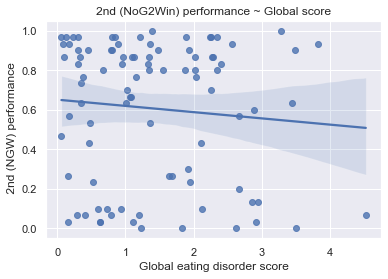

In [70]:
plt.figure()

sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2win_second_session' )
plt.title('2nd (NoG2Win) performance ~ Global score')

plt.xlabel('Global eating disorder score')
plt.ylabel(' 2nd (NGW) performance')



In [71]:
smf.ols(formula = 'nogo2win_second_session ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     nogo2win_second_session   R-squared:                       0.008
Model:                                 OLS   Adj. R-squared:                 -0.003
Method:                      Least Squares   F-statistic:                    0.7494
Date:                     Fri, 11 Feb 2022   Prob (F-statistic):              0.389
Time:                             10:33:40   Log-Likelihood:                -33.270
No. Observations:                       91   AIC:                             70.54
Df Residuals:                           89   BIC:                             75.56
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6512      0.063     10.273      0.000       0.525       0.777
global_score    -0.0316      0.037     -0.866      0.389      -0.104       0.041
==============================================================================
Omnibus:                       38.593   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.179
Skew:                          -0.600   Prob(JB):                      0.00374
Kurtosis:                       1.773   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="EDE_nogo2avoid"></a>
# Nogo2AvoidPunishment and Food disorder index

<a id="EDE_mean_nogo2avoid"></a>
### Average of Nogo2Avoid vs.Food disorder index

<AxesSubplot:xlabel='global_score', ylabel='nogo2avoidPun_mean_performance'>

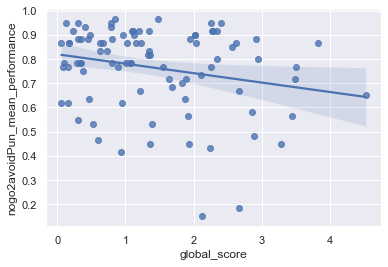

In [72]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2avoidPun_mean_performance' )

In [73]:
smf.ols(formula = 'nogo2avoidPun_mean_performance ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     nogo2avoidPun_mean_performance   R-squared:                       0.054
Model:                                        OLS   Adj. R-squared:                  0.043
Method:                             Least Squares   F-statistic:                     5.046
Date:                            Fri, 11 Feb 2022   Prob (F-statistic):             0.0272
Time:                                    10:33:43   Log-Likelihood:                 34.369
No. Observations:                              91   AIC:                            -64.74
Df Residuals:                                  89   BIC:                            -59.72
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8198      0.030     27.199      0.000       0.760       0.880
global_score    -0.0390      0.017     -2.246      0.027      -0.074      -0.005
==============================================================================
Omnibus:                       22.628   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.771
Skew:                          -1.222   Prob(JB):                     3.43e-07
Kurtosis:                       4.370   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="EDE_first_nogo2avoid"></a>
### First nogo2AvoidPun vs. Food disorder index

<AxesSubplot:xlabel='global_score', ylabel='nogo2avoidPun_first_session'>

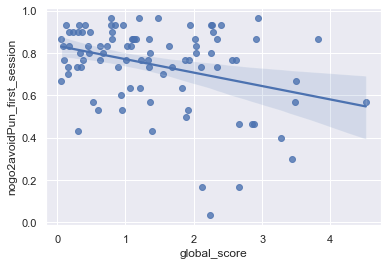

In [74]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2avoidPun_first_session' )

In [75]:
smf.ols(formula = 'nogo2avoidPun_first_session ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     nogo2avoidPun_first_session   R-squared:                       0.114
Model:                                     OLS   Adj. R-squared:                  0.104
Method:                          Least Squares   F-statistic:                     11.43
Date:                         Fri, 11 Feb 2022   Prob (F-statistic):            0.00107
Time:                                 10:33:46   Log-Likelihood:                 27.406
No. Observations:                           91   AIC:                            -50.81
Df Residuals:                               89   BIC:                            -45.79
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8344      0.033     25.643      0.000       0.770       0.899
global_score    -0.0634      0.019     -3.381      0.001      -0.101      -0.026
==============================================================================
Omnibus:                       22.490   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.137
Skew:                          -1.144   Prob(JB):                     1.73e-07
Kurtosis:                       4.724   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gender"></a>
# Gender Analysis

<a id="EDE_gender"></a>
### Eating disorder index vs. gender

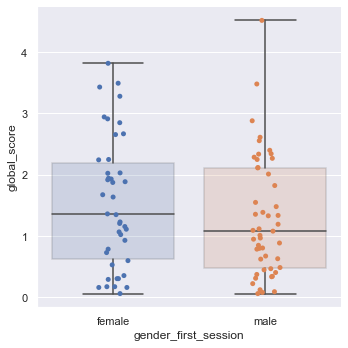

In [76]:
ax = sns.catplot(x = 'gender_first_session', y = 'global_score', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'global_score',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

In [77]:
stats.ttest_ind(perf_questionnaire_data[perf_questionnaire_data.gender_first_session == 'male'].global_score,
                perf_questionnaire_data[perf_questionnaire_data.gender_first_session == 'female'].global_score)

Ttest_indResult(statistic=-1.1104871995843522, pvalue=0.2697803775032242)

<a id="EDE_gender_performance"></a>
### nogo2win performance vs. gender

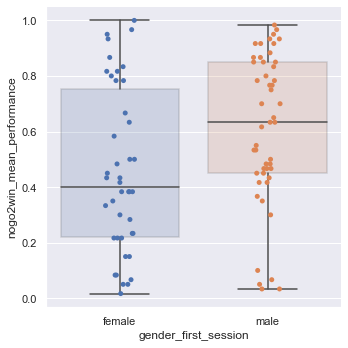

In [78]:
ax = sns.catplot(x = 'gender_first_session', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'nogo2win_mean_performance',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

In [79]:
stats.ttest_ind(perf_questionnaire_data[perf_questionnaire_data.gender_first_session == 'male'].nogo2win_mean_performance,
                perf_questionnaire_data[perf_questionnaire_data.gender_first_session == 'female'].nogo2win_mean_performance)

Ttest_indResult(statistic=2.628542216076171, pvalue=0.01010030119281933)

<a id="EDE_nogo2win_gender"></a>
### Nogo2win performance vs. Eating disorder index (Colorize by gender)

<Figure size 432x288 with 0 Axes>

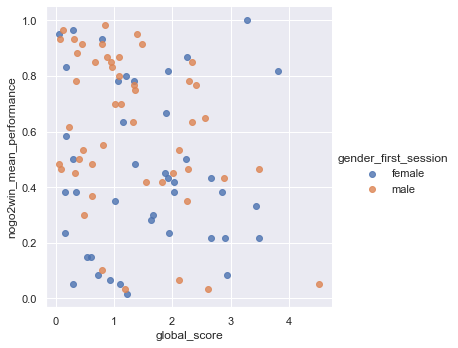

In [80]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="global_score", data=perf_questionnaire_data, fit_reg=False, hue='gender_first_session', legend=True)
# plt.title

<a id="age_nogo2win"></a>
# Age Vs. NoGo2Win Performance

<Figure size 432x288 with 0 Axes>

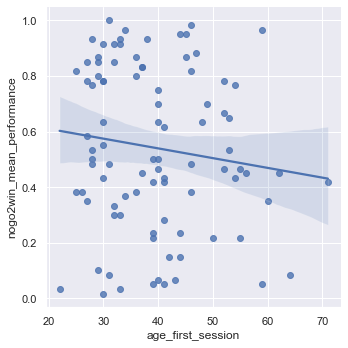

In [81]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="age_first_session", data=perf_questionnaire_data,  fit_reg=True)

In [82]:
smf.ols(formula = 'nogo2win_mean_performance ~ age_first_session', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.016
Model:                                   OLS   Adj. R-squared:                  0.005
Method:                        Least Squares   F-statistic:                     1.454
Date:                       Fri, 11 Feb 2022   Prob (F-statistic):              0.231
Time:                               10:34:37   Log-Likelihood:                -15.500
No. Observations:                         91   AIC:                             35.00
Df Residuals:                             89   BIC:                             40.02
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6797      0.119      5.728      0.000       0.444       0.915
age_first_session    -0.0035      0.003     -1.206      0.231      -0.009       0.002
==============================================================================
Omnibus:                       14.692   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.654
Skew:                          -0.203   Prob(JB):                       0.0976
Kurtosis:                       1.969   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="bmi_nogo2win"></a>
## BMI index vs. nogo2win performance

<Figure size 432x288 with 0 Axes>

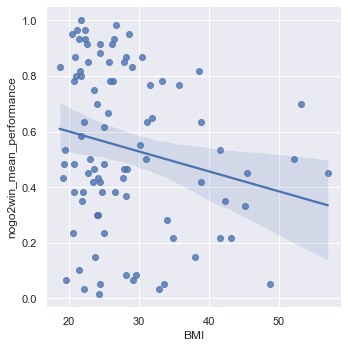

In [83]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="BMI", data=perf_questionnaire_data,  fit_reg=True)
# plt.title

In [84]:
smf.ols(formula = 'nogo2win_mean_performance ~ BMI', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.042
Model:                                   OLS   Adj. R-squared:                  0.032
Method:                        Least Squares   F-statistic:                     3.949
Date:                       Fri, 11 Feb 2022   Prob (F-statistic):             0.0500
Time:                               10:34:44   Log-Likelihood:                -14.262
No. Observations:                         91   AIC:                             32.52
Df Residuals:                             89   BIC:                             37.55
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7444      0.106      6.991      0.000       0.533       0.956
BMI           -0.0072      0.004     -1.987      0.050      -0.014   -5.13e-07
==============================================================================
Omnibus:                       18.385   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.463
Skew:                          -0.262   Prob(JB):                       0.0651
Kurtosis:                       1.920   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="Quind_nogo2win"></a>
# Other Questionnaire Index Vs. nogo2win Performance

<a id="restraint_nogo2win"></a>
### Restraint Index Vs. nogo2win Performance

<AxesSubplot:xlabel='restraint', ylabel='nogo2win_mean_performance'>

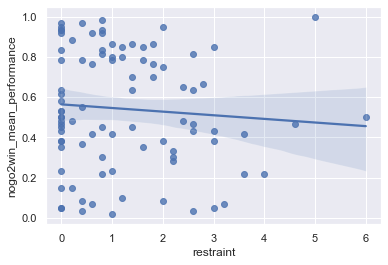

In [85]:
sns.regplot(data = perf_questionnaire_data, x = 'restraint', y = 'nogo2win_mean_performance')

In [86]:
test_res = stats.pearsonr(perf_questionnaire_data.restraint, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.08101958199452565
p-value:  0.4451952532872317


<a id="eating_concern_nogo2win"></a>
### Eating concern vs. nogo2win average performance

<AxesSubplot:xlabel='eating_concern', ylabel='nogo2win_mean_performance'>

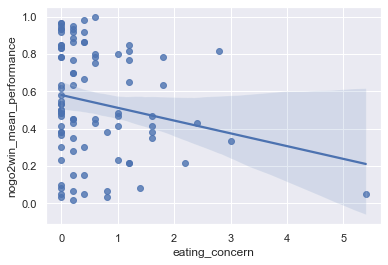

In [87]:
sns.regplot(data = perf_questionnaire_data, x = 'eating_concern', y = 'nogo2win_mean_performance')

In [88]:
smf.ols(formula = 'nogo2win_mean_performance ~ eating_concern', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.040
Model:                                   OLS   Adj. R-squared:                  0.029
Method:                        Least Squares   F-statistic:                     3.711
Date:                       Fri, 11 Feb 2022   Prob (F-statistic):             0.0572
Time:                               10:34:55   Log-Likelihood:                -14.379
No. Observations:                         91   AIC:                             32.76
Df Residuals:                             89   BIC:                             37.78
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5804      0.036     16.017      0.000       0.508       0.652
eating_concern    -0.0683      0.035     -1.926      0.057      -0.139       0.002
==============================================================================
Omnibus:                       14.004   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.653
Skew:                          -0.220   Prob(JB):                       0.0976
Kurtosis:                       1.983   Cond. No.                         1.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="weight_concern_nogo2win"></a>
### Weight Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='weight_concern', ylabel='nogo2win_mean_performance'>

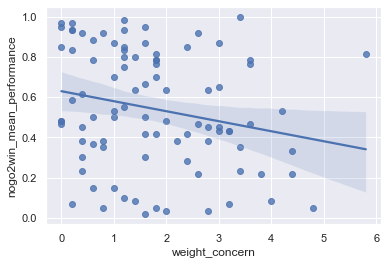

In [89]:
sns.regplot(data = perf_questionnaire_data, x = 'weight_concern', y = 'nogo2win_mean_performance')

In [90]:
test_res = stats.pearsonr(perf_questionnaire_data.weight_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.22392585439718352
p-value:  0.03286222869767361


<a id= "shape_concern_nogo2win"></a>
### Shape Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='shape_concern', ylabel='nogo2win_mean_performance'>

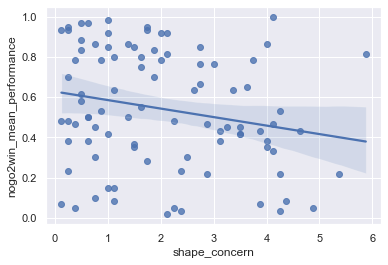

In [91]:
sns.regplot(data = perf_questionnaire_data, x = 'shape_concern', y = 'nogo2win_mean_performance')

In [92]:
test_res = stats.pearsonr(perf_questionnaire_data.shape_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.2131458442939906
p-value:  0.04250432067685771


<a id="pet"></a>
# Pet Analysis

<a id="haspet_ng2win"></a>
### Nogo 2 Win Performance Vs. has-pet

It seems we have not enough data to compare these 2 groups

In [93]:
sns.catplot(x = 'has_pet', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)

ValueError: Could not interpret input 'has_pet'

<a id="petnumber_ng2win"></a>
### Pet counts vs. Nogo 2 Win Performance 

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

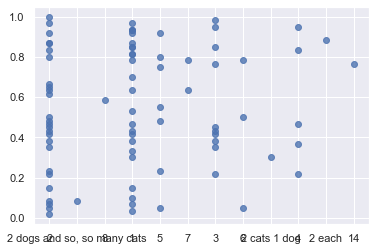

In [94]:
sns.regplot(data = perf_questionnaire_data, x = 'pet-number', y = 'nogo2win_mean_performance')

In [140]:
test_res = stats.pearsonr(perf_questionnaire_data.dropna(subset=['pet-number'])['pet-number'], perf_questionnaire_data.dropna(subset=['pet-number']).nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   0.02658494027433185
p-value:  0.8776828294964419


<a id="pettype_ng2win"></a>
### Pet type vs. Nogo 2 Win Performance 

In [141]:
def clean_pet_type(pet_type):
    if all(x in pet_type for x in ['cat', 'dog']):
        return "both"
    elif('dog' in pet_type):
        return "dog"
    elif('cat' in pet_type):
        return "cat"
    else:
        return ""


In [142]:
perf_questionnaire_data_has_pet = perf_questionnaire_data.dropna(subset=['pet-type'])

In [143]:
perf_questionnaire_data_has_pet["pet-type"] = perf_questionnaire_data_has_pet["pet-type"].map(lambda x: clean_pet_type(x))

/var/folders/5p/j5wvkpqj2_n5r5h100pdscbr0000gn/T/ipykernel_64110/1936678068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_questionnaire_data_has_pet["pet-type"] = perf_questionnaire_data_has_pet["pet-type"].map(lambda x: clean_pet_type(x))


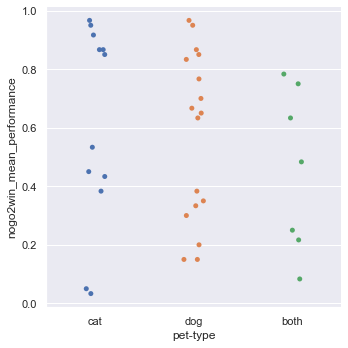

In [144]:
sns.catplot(x = 'pet-type', y = 'nogo2win_mean_performance', data = perf_questionnaire_data_has_pet)

<a id="EDE_bmi"></a>
# Eating disorder index vs. BMI

<AxesSubplot:xlabel='BMI', ylabel='global_score'>

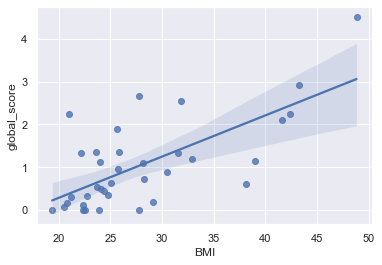

In [145]:
sns.regplot(data = perf_questionnaire_data_has_pet, y = 'global_score', x = 'BMI')

In [146]:
test_res = stats.pearsonr(perf_questionnaire_data['global_score'], perf_questionnaire_data['BMI'])
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   0.6115234035185763
p-value:  3.5365081899800524e-05


<a id="prediction"></a>
# Eating disorder prediction (Ridge regression) 

In [147]:
model = smf.ols(formula = 'global_score ~  nogo2win_first_session + go2win_first_session + 	nogo2avoidPun_first_session + go2avoidPun_first_session + BMI',
                 data = perf_questionnaire_data)

model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           global_score   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     4.560
Date:                Tue, 28 Dec 2021   Prob (F-statistic):            0.00286
Time:                        20:56:42   Log-Likelihood:                -45.032
No. Observations:                  39   AIC:                             102.1
Df Residuals:                      33   BIC:                             112.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.2163      1.030     -0.210      0.835      -2.311       1.879
nogo2win_first_session         -0.1888      0.425     -0.444      0.660      -1.054       0.676
go2win_first_session            0.2825      1.313      0.215      0.831      -2.390       2.955
nogo2avoidPun_first_session    -0.7072      0.903     -0.783      0.439      -2.544       1.130
go2avoidPun_first_session      -0.5107      0.938     -0.544      0.590      -2.420       1.399
BMI                             0.0699      0.018      3.975      0.000       0.034       0.106
==============================================================================
Omnibus:                        3.884   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.656
Skew:                           0.588   Prob(JB):                        0.265
Kurtosis:                       3.503   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# model.fit_regularized(alpha=0.05, L1_wt=0.5).summary()